## Data Cleaning

In [1]:
# import all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# """TO READ FILE"""
# import os
# os.chdir(r"C:\Users\Deonne\OneDrive - Nanyang Technological University\Desktop\Y2S1\Biohackathon")
# #os.chdir(r"path")
# print("Current working directory is:", os.getcwd())

In [3]:
# reading the data
cc_data = pd.read_csv("cervical-cancer_csv.csv")

In [4]:
cc_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
cc_data.shape

(835, 36)

In [6]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [7]:
cc_data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Meaning of the columns:

In [8]:
# checking for any NULL values
cc_data.isna().any()

Age                                   False
Number of sexual partners              True
First sexual intercourse               True
Num of pregnancies                     True
Smokes                                 True
Smokes (years)                         True
Smokes (packs/year)                    True
Hormonal Contraceptives                True
Hormonal Contraceptives (years)        True
IUD                                    True
IUD (years)                            True
STDs                                   True
STDs (number)                          True
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

CLEAN DATA BASED ON COLUMN TYPE

In [9]:
binary_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
    'STDs:condylomatosis', 'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

duration_cols = [
    'Smokes (years)', 'Smokes (packs/year)',
    'Hormonal Contraceptives (years)', 'IUD (years)',
    'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'
]

num_cols = [
    'Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
    'STDs (number)', 'STDs: Number of diagnosis'
]

try:
    cc_data[binary_cols] = cc_data[binary_cols].fillna(0)
    cc_data[duration_cols] = cc_data[duration_cols].fillna(0)

    # Fill numerical columns with median 
    for col in num_cols:
        if col in cc_data.columns:
            cc_data[col].fillna(cc_data[col].median(), inplace=True)

    # shows unique values of isna, will show if there are still columns with missing values
    print(cc_data.isna().any().unique())

except Exception as e:
    # exception handling
    print(f"An error occurred while filling missing data: {e}")

[False]


In [10]:
# finding duplicated data
dup = cc_data.duplicated().sum()
print(f"Number of duplicated rows: {dup}")

# dropping duplicates
cc_data.drop_duplicates(inplace=True)

Number of duplicated rows: 15


In [11]:
unique_values = cc_data.apply(lambda x: x.unique())
print(unique_values)

Age                                   [18, 15, 34, 52, 46, 42, 51, 26, 45, 44, 27, 4...
Number of sexual partners             [4.0, 1.0, 5.0, 3.0, 2.0, 6.0, 7.0, 15.0, 8.0,...
First sexual intercourse              [15.0, 14.0, 17.0, 16.0, 21.0, 23.0, 26.0, 20....
Num of pregnancies                    [1.0, 4.0, 2.0, 6.0, 3.0, 5.0, 8.0, 7.0, 0.0, ...
Smokes                                                                       [0.0, 1.0]
Smokes (years)                        [0.0, 37.0, 34.0, 1.266972909, 3.0, 12.0, 18.0...
Smokes (packs/year)                   [0.0, 37.0, 3.4, 2.8, 0.04, 0.5132021277, 2.4,...
Hormonal Contraceptives                                                      [0.0, 1.0]
Hormonal Contraceptives (years)       [0.0, 3.0, 15.0, 2.0, 8.0, 10.0, 5.0, 0.25, 7....
IUD                                                                          [0.0, 1.0]
IUD (years)                           [0.0, 7.0, 5.0, 8.0, 6.0, 1.0, 0.58, 2.0, 19.0...
STDs                            

In [12]:
# dropping those columns with only 0 as the unqiue value as they have no use in identifying the cancer 
zero_cols = cc_data.columns[(cc_data == 0).all()]
print("Columns with only 0:", list(zero_cols))

cc_data = cc_data.drop(columns=zero_cols)

Columns with only 0: ['STDs:cervical condylomatosis', 'STDs:AIDS']


from the unique values above, we can see that columns `STDs:condylomatosis` and `STDs:AIDS` only have the unique value of `0`. Thus their correlation cannot be plotted in the heatmap as shown below

# EDA (Exploratory Data Analysis)

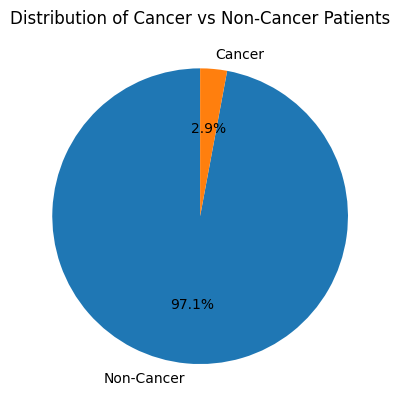

In [30]:
# cancer to non-cancer patient ration
counts = cc_data['Dx'].value_counts()

# Plot pie chart
plt.pie(
    counts,
    labels=["Non-Cancer", "Cancer"],   # adjust order if needed
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribution of Cancer vs Non-Cancer Patients")
plt.show()


Insight: small portion of patients in this dataset have the 

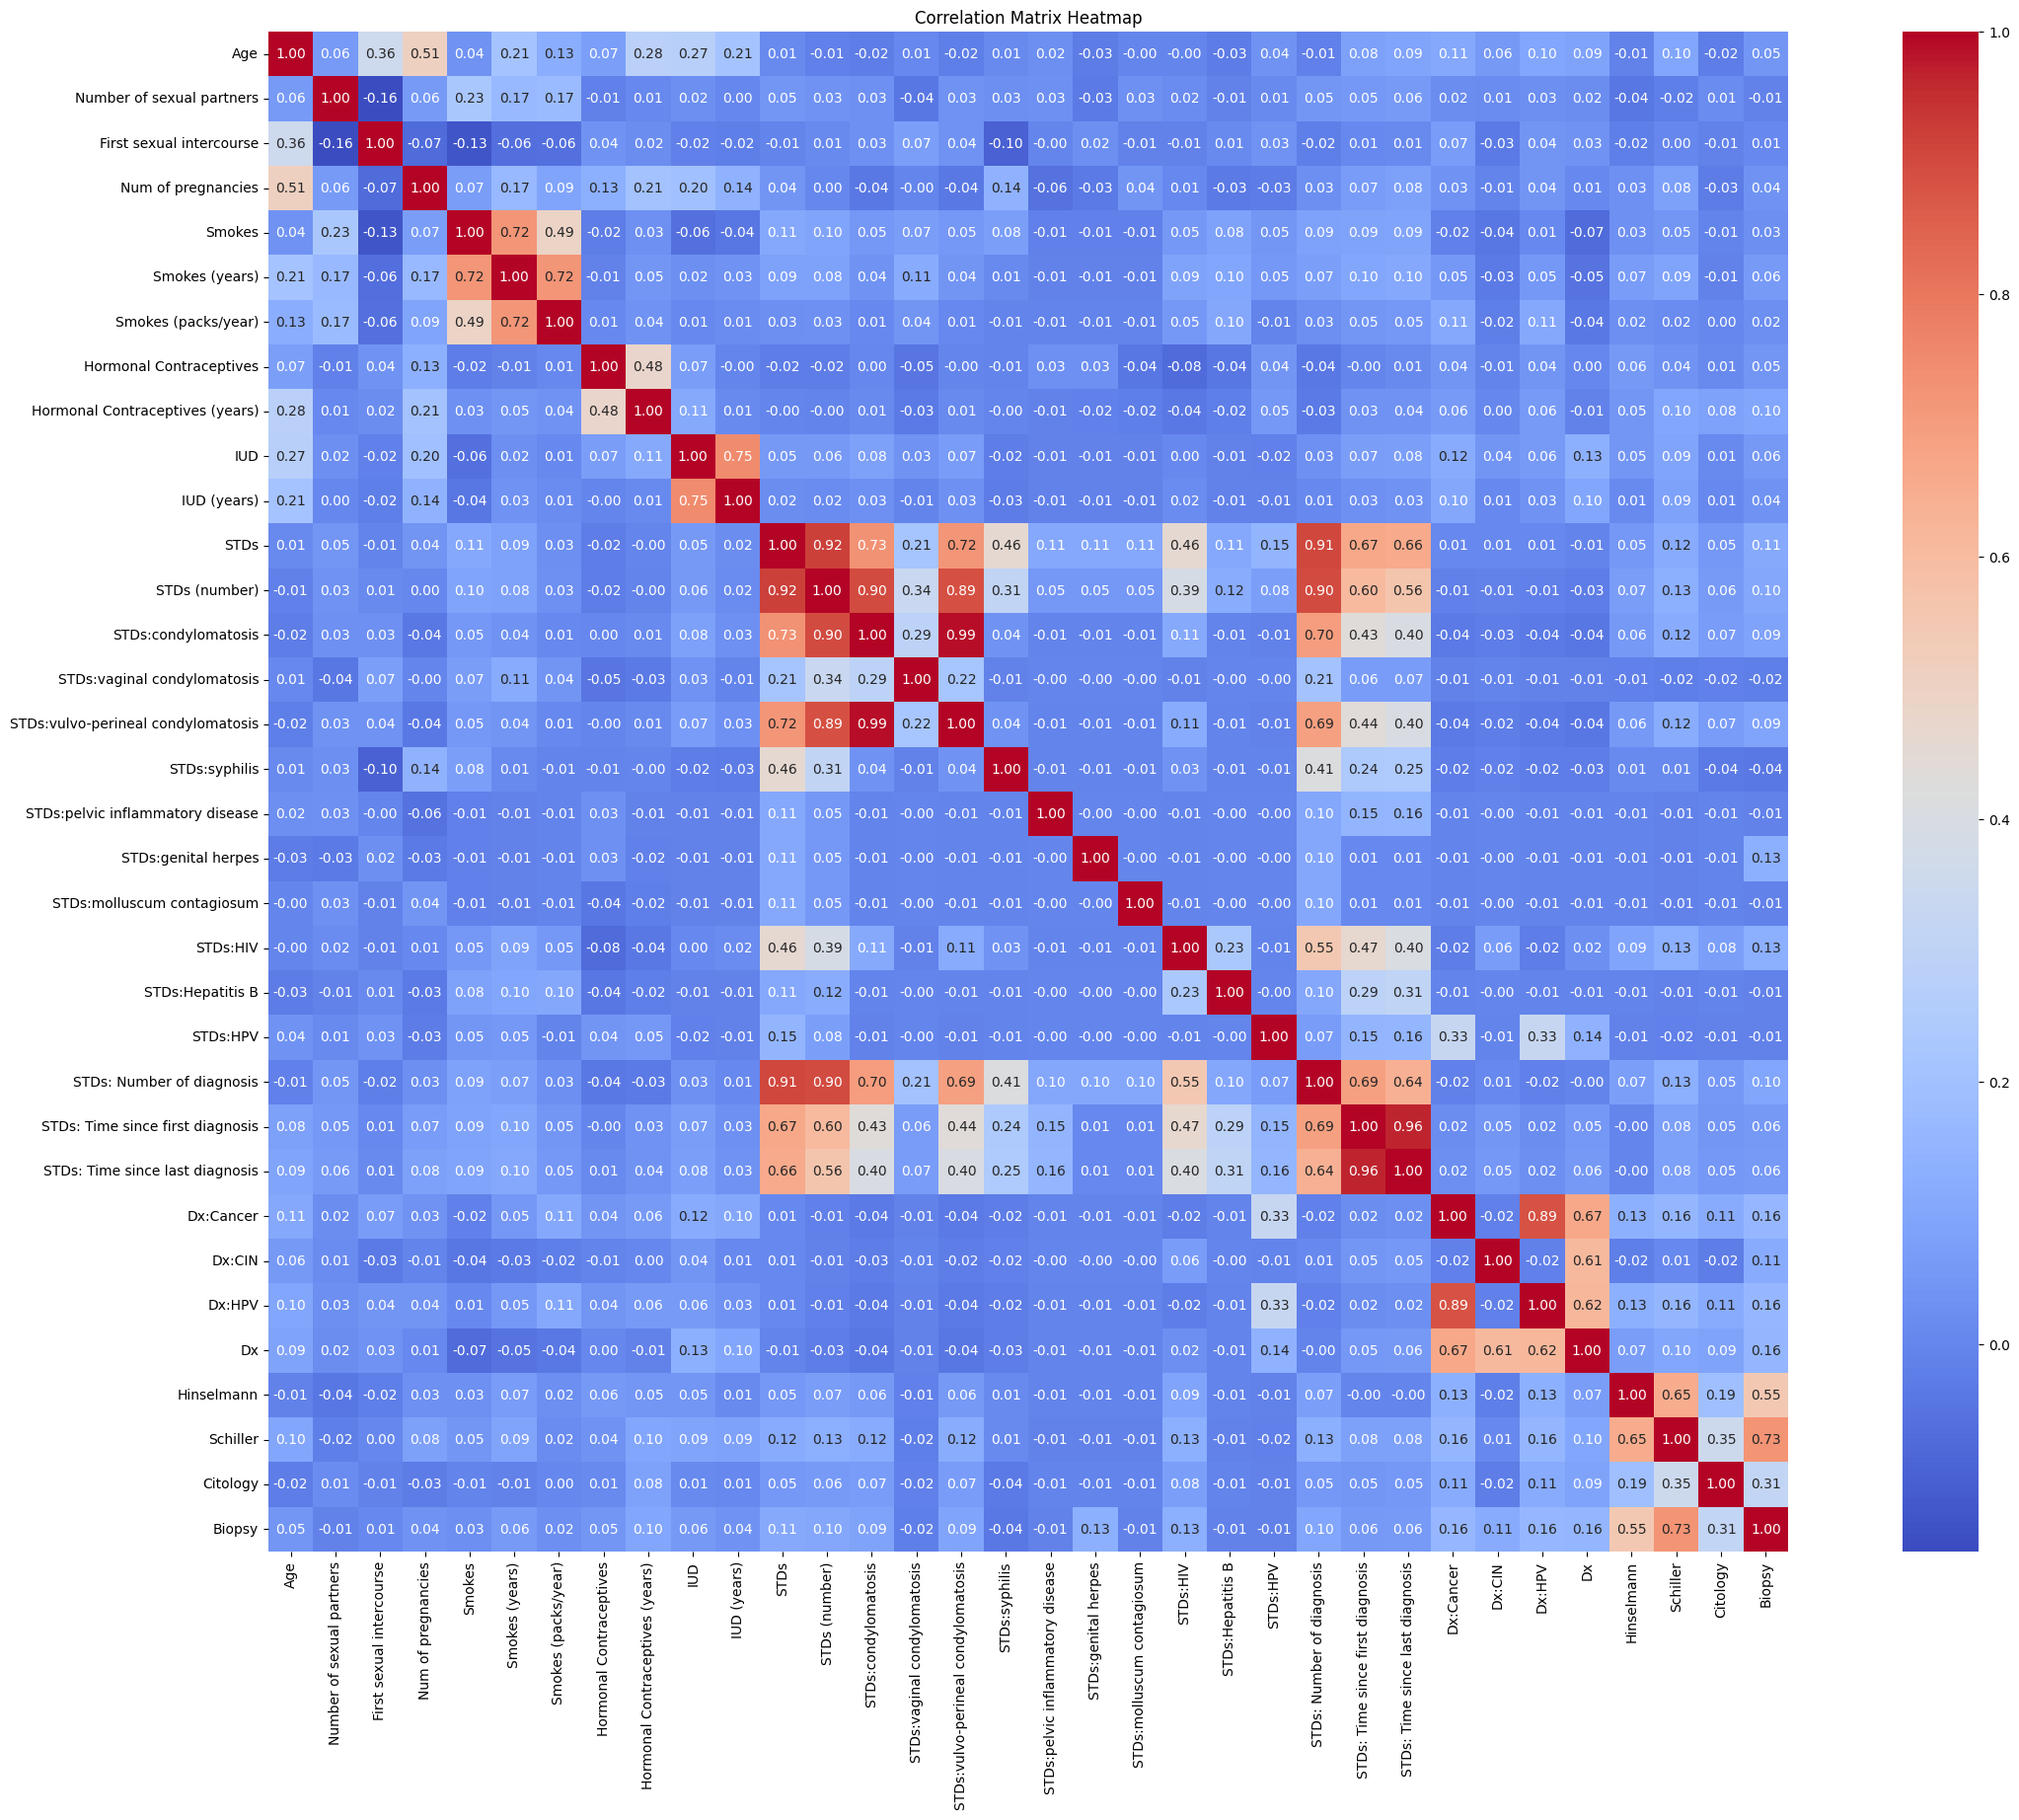

In [13]:
# plotting correlation matrix (determining the weight of each factor)

corr = cc_data.corr()

# Plot heatmap
plt.figure(figsize=(30,20))
sns.heatmap(
    corr,
    annot=True,       # Show numbers
    cmap="coolwarm",  # Color map
    fmt=".2f",        # Format numbers to 2 decimals
    mask=None,        # Do NOT hide upper/lower triangle
    cbar=True,        # Show color bar
    square=True      # Make cells square for readability
)
plt.title("Correlation Matrix Heatmap")
plt.show()

observing the correlation heatmap, we are only focusing on the `Dx` column as it is the target variable that we are using 

possible columns to use: (closer to 1 the better)
- 

From these columns, we can observe that HPV is highly correlated to the cancer outcome

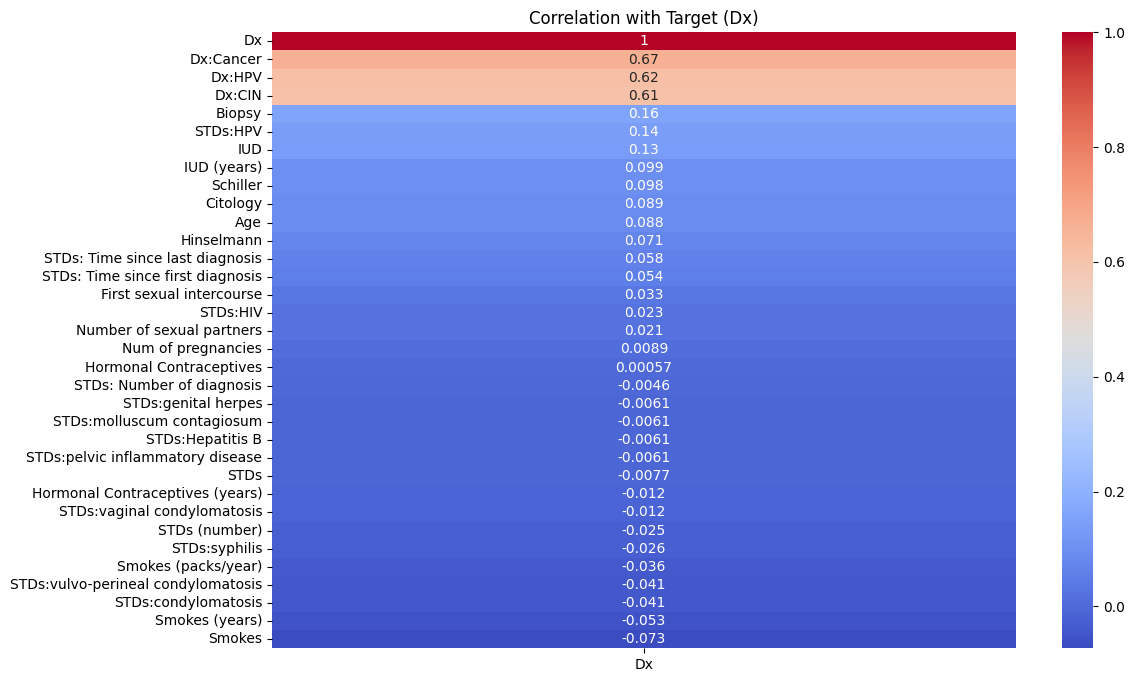

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cc_data.corr()[['Dx']].sort_values('Dx', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Target (Dx)")
plt.show()

Meaning of the columns

`Hinselmann`, `Schiller` - tests taken specifically on the cervix

`Citology`, `Biopsy` - tests taken generally to test for cancerous cells 

## Patients diagnosed with cervical cancer
Studying the data on patients diagnosed with cancer - `Dx` = 1

In [15]:
pwc_data = cc_data[cc_data["Dx"] == 1]

### non-binary cols

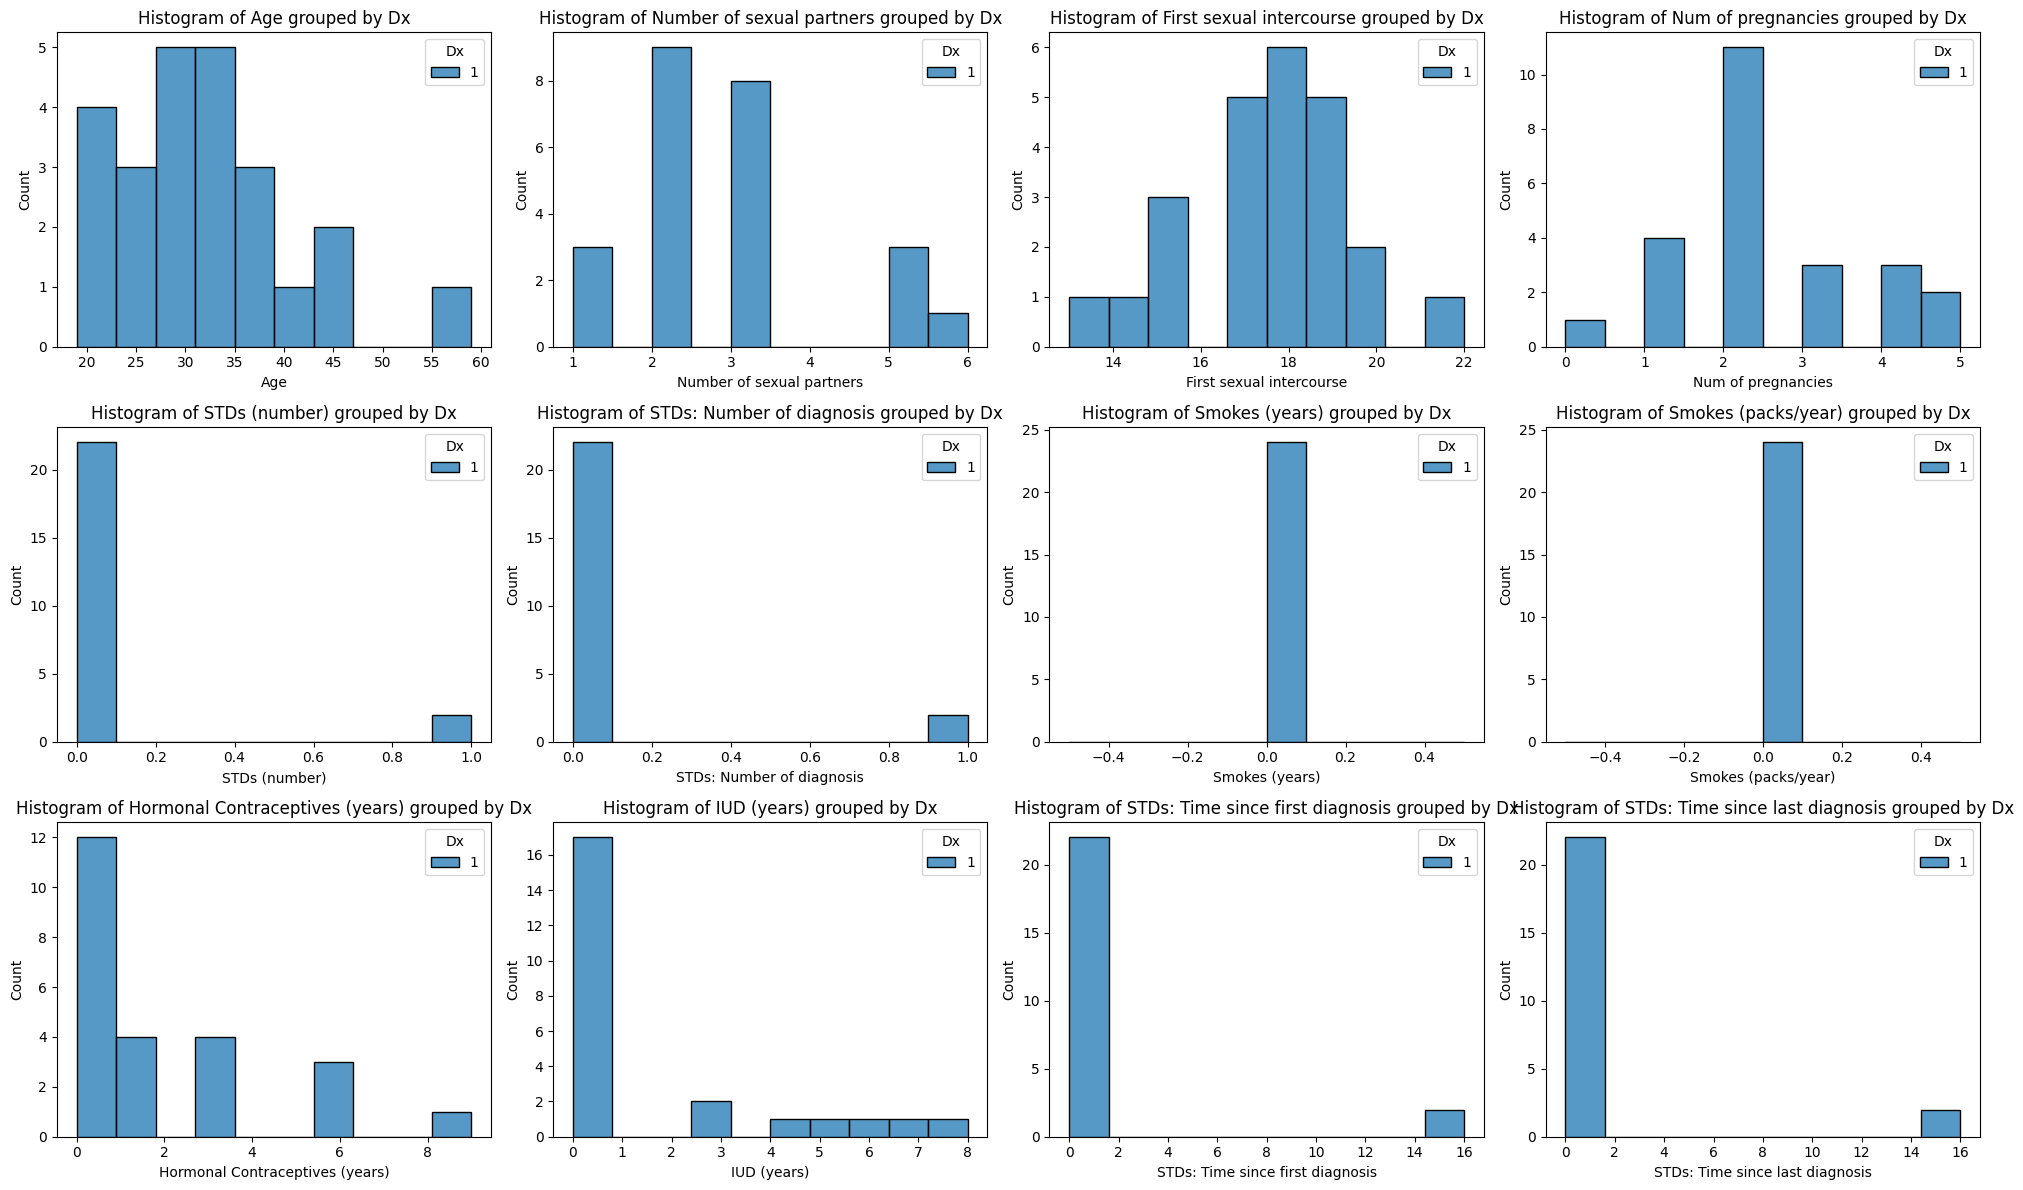

In [34]:
# plotting histograms side by side
target = "Dx"
cols_to_plot = num_cols + duration_cols

# set up grid
n_cols = 4   # how many plots per row
n_rows = -(-len(cols_to_plot) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # flatten to 1D for easy indexing

for i, col in enumerate(cols_to_plot):
    sns.histplot(
        data=pwc_data,
        x=col,
        hue=target,
        bins=10,
        kde=False,
        multiple="dodge",
        ax=axes[i]
    )
    axes[i].set_title(f"Histogram of {col} grouped by {target}")

# remove any unused axes (if cols don’t fill grid)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight: 
- most patients with cervical cancer are of the 30-40 age range and their first sexual intercourse at about 18.
- most cervical cancer patients have had at least 2 pregnancies
- most cervical cancer patients have had 2 or more sexual partners

### binary cols

In [31]:
def binary_plotting(binary_cols):
    # Store counts for each binary column
    counts_0 = []
    counts_1 = []
    valid_cols = []

    for col in binary_cols:
        if pwc_data[col].nunique() == 2:
            counts = pwc_data[col].value_counts().sort_index()
            counts_0.append(counts[0])
            counts_1.append(counts[1])
            valid_cols.append(col)

    # Plot all in one stacked bar chart
    plt.bar(valid_cols, counts_0, label="0 (No)")
    plt.bar(valid_cols, counts_1, bottom=counts_0, label="1 (Yes)")

    plt.ylabel("Count")
    plt.title("Distribution of Binary Features")
    plt.xticks(rotation=45, ha="right")  # rotate labels if many columns
    plt.legend()
    plt.show()

    
def binary_crosstab(binary_cols):
    for col in binary_cols:
        if pwc_data[col].nunique() == 2:
            print(f"cross-tab for {col}")
            print(pd.crosstab(cc_data["Dx"], cc_data[col], normalize="index"))
            print(" ")

In [18]:
binary_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
    'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
    'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

In [23]:
binary_crosstab(binary_cols)

cross-tab for Hormonal Contraceptives
Hormonal Contraceptives       0.0       1.0
Dx                                         
0                        0.418342  0.581658
1                        0.416667  0.583333
 
cross-tab for IUD
IUD       0.0       1.0
Dx                     
0    0.905779  0.094221
1    0.666667  0.333333
 
cross-tab for STDs
STDs       0.0       1.0
Dx                      
0     0.903266  0.096734
1     0.916667  0.083333
 
cross-tab for STDs:HIV
STDs:HIV       0.0       1.0
Dx                          
0         0.978643  0.021357
1         0.958333  0.041667
 
cross-tab for STDs:HPV
STDs:HPV       0.0       1.0
Dx                          
0         0.998744  0.001256
1         0.958333  0.041667
 
cross-tab for Dx:Cancer
Dx:Cancer         0         1
Dx                           
0          0.994975  0.005025
1          0.416667  0.583333
 
cross-tab for Dx:CIN
Dx:CIN      0      1
Dx                  
0       1.000  0.000
1       0.625  0.375
 
cross-tab fo

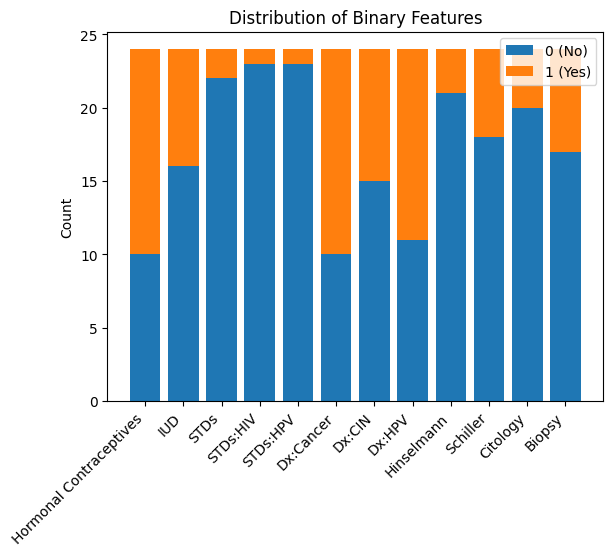

In [32]:
binary_plotting(binary_cols)

# Overall Insights: 
- `HPV` is highly correlated to cervical cancer, but may not be a cause of it. backed with research, "HPV is primary cause of cervical cancer, nearly all are caused by infection with high-risk types of HPV (eg. HPV 16 & 18), viruses interfere with genetic material of host cells & accelerate development of cervical cancer"
- `Hormonal Contraceptives` is a column that we should take note of, as a number of cervical cancer patients are on hormonal contraceptives. From research, Taking contraceptive pill for >5 years increases susceptibility to HPV infection 

In [21]:
import os
print("Current working directory:", os.getcwd())
cc_data.to_csv("cleaned_cervical_cancer.csv", index=False)

Current working directory: c:\Users\chelyn\OneDrive - Nanyang Technological University\biohackathon\Biohackathon Materials\Cervical Cancer
